In [1]:
%config IPCompleter.greedy=True

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Zadanie 5

## a)
W tym zadaniu należało stwierdzić, jak dobór funkcji $m$ dla multizbioru $\mathfrak{M} = (S, m)$ wpływa na wartość estymacji $\hat{n}$.

## b)
W tej części zadania 5. należało dla $k \in \{1, 2, 3, 100, 400 \}$ i $n = 1, \dots, 10^4$ sprawdzić wyniki zwracane przez algorytm $\texttt{MinCount}$. Na podstawie otrzymanych wyników wyliczono stosunek $\frac{\hat{n}}{n}$.

In [3]:
data_5b = pd.read_csv('data/5b.csv')
data_5b['estimated/n'] = data_5b['estimated'] / data_5b['n']
data_5b

,k,n,expected,estimated,estimated/n
0,2,1,1,1,1.000000
1,2,2,2,1,0.500000
2,2,3,3,1,0.333333
3,2,4,4,1,0.250000
4,2,5,5,1,0.200000
...,...,...,...,...,...
49995,400,9996,9996,10713,1.071729
49996,400,9997,9997,10713,1.071621
49997,400,9998,9998,10713,1.071514
49998,400,9999,9999,10713,1.071407


Text(0.5, 1.0, 'k=400')

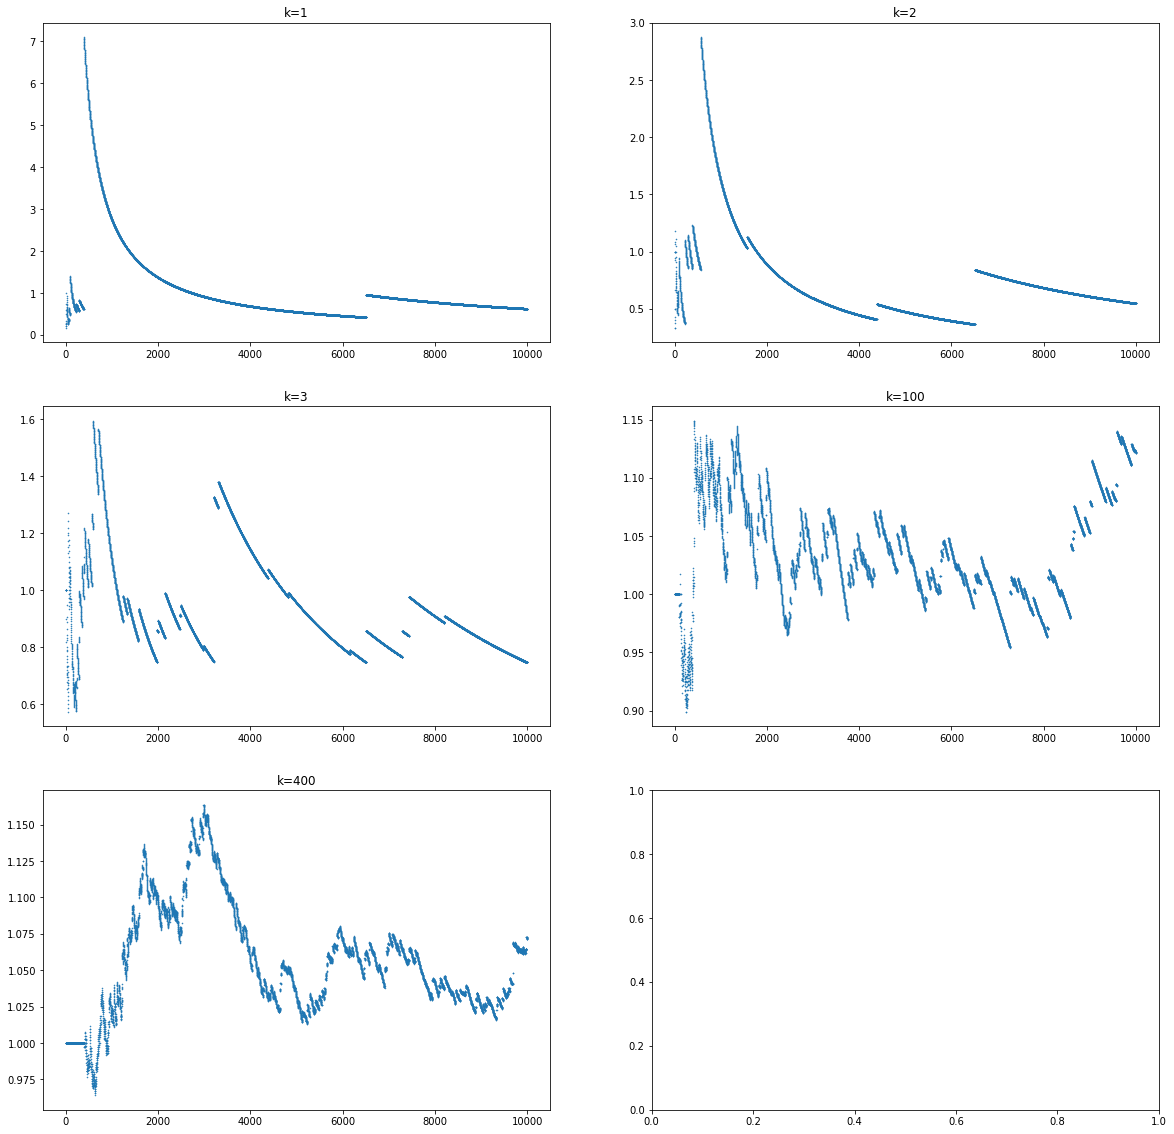

In [4]:
x = np.linspace(1, 10000, 10000)
fig, ax = plt.subplots(3, 2, figsize=(20,20))
size = 0.3
ax[0, 0].scatter(x, data_5b['estimated/n'][0:10000], s=size)
ax[0, 0].set_title("k=1")
ax[0, 1].scatter(x, data_5b['estimated/n'][10000:20000], s=size)
ax[0, 1].set_title("k=2")
ax[1, 0].scatter(x, data_5b['estimated/n'][20000:30000], s=size)
ax[1, 0].set_title("k=3")
ax[1, 1].scatter(x, data_5b['estimated/n'][30000:40000], s=size)
ax[1, 1].set_title("k=100")
ax[2, 0].scatter(x, data_5b['estimated/n'][40000:50000], s=size)
ax[2, 0].set_title("k=400")

## c)

W tym zadaniu należało eksperymentalnie wyznaczyć wartość $k$, dla którego zachodzi zależność $|\frac{\hat{n}}{n} - 1| < 10$%

In [5]:
data_5c = pd.read_csv('data/5c.csv')
data_5c['ratio'] = abs((data_5c['estimated'] / data_5c['n']) - 1.0) < 0.1
data_5c

,k,n,expected,estimated,ratio
0,110,1,1,1,True
1,110,2,2,2,True
2,110,3,3,3,True
3,110,4,4,4,True
4,110,5,5,5,True
...,...,...,...,...,...
49995,130,9996,9996,10100,True
49996,130,9997,9997,10100,True
49997,130,9998,9998,10100,True
49998,130,9999,9999,10100,True


In [6]:
summary_5c = data_5c.groupby('k').agg([np.mean])
summary_5c

,n,expected,estimated,ratio
,mean,mean,mean,mean
k,,,,
110,5000.5,5000.5,5141.7745,0.9351
115,5000.5,5000.5,5133.1594,0.9434
120,5000.5,5000.5,5121.8815,0.9507
125,5000.5,5000.5,5137.1719,0.9562
130,5000.5,5000.5,5164.9043,0.9543


# Zadanie 6

W tem zadaniu należało dla $k \in \{1, 2, 3, 100, 400 \}$ i $n = 1, \dots, 10^4$ sprawdzić wyniki zwracane przez algorytm $\texttt{MinCount}$. Próby przeprowadzony dla funkcji haszujących - MD5, SHA1, SHA256 oraz SHA512. Celem zadania było sprawdzenie jak długość hasha wpływa na jakość otrzymywanych wyników. Długości otrzymywanych hashy skracano do odpowiedniej liczby bitów $b \in \{8, 16, 32, 64, 128, 256 \}$

In [7]:
data_6 = pd.read_csv('data/6.csv')
data_6['diff'] = abs((data_6['expected'] - data_6['estimated']) / data_6['expected']) * 100
data_6

,hash,b,expected,estimated,diff
0,md5,8,10000,254,97.46
1,md5,8,10000,254,97.46
2,md5,8,10000,254,97.46
3,md5,8,10000,254,97.46
4,md5,8,10000,254,97.46
...,...,...,...,...,...
23995,sha512,256,10000,9930,0.70
23996,sha512,256,10000,9930,0.70
23997,sha512,256,10000,9930,0.70
23998,sha512,256,10000,9930,0.70


In [8]:
summary_6 = data_6.groupby(['hash', 'b']).agg([np.min, np.max, np.mean])
summary_6

expected               estimated                 diff              
               amin   amax   mean      amin   amax   mean   amin   amax   mean
hash   b                                                                      
md5    8      10000  10000  10000       254    254    254  97.46  97.46  97.46
       16     10000  10000  10000      9187   9187   9187   8.13   8.13   8.13
       32     10000  10000  10000      9913   9913   9913   0.87   0.87   0.87
       64     10000  10000  10000      9913   9913   9913   0.87   0.87   0.87
       128    10000  10000  10000      9259   9259   9259   7.41   7.41   7.41
       256    10000  10000  10000      9259   9259   9259   7.41   7.41   7.41
sha1   8      10000  10000  10000       254    254    254  97.46  97.46  97.46
       16     10000  10000  10000      8506   8506   8506  14.94  14.94  14.94
       32     10000  10000  10000      8943   8943   8943  10.57  10.57  10.57
       64     10000  10000  10000      8943   8943   8943  10.57  10.57  10.57
       128    10000  10000  10000     10701  10701  10701   7.01   7.01   7.01
       256    10000  10000  10000      9582   9582   9582   4.18   4.18   4.18
sha256 8      10000  10000  10000       254    254    254  97.46  97.46  97.46
       16     10000  10000  10000      8745   8745   8745  12.55  12.55  12.55
       32     10000  10000  10000      9311   9311   9311   6.89   6.89   6.89
       64     10000  10000  10000      9311   9311   9311   6.89   6.89   6.89
       128    10000  10000  10000     10058  10058  10058   0.58   0.58   0.58
       256    10000  10000  10000     10713  10713  10713   7.13   7.13   7.13
sha512 8      10000  10000  10000       254    254    254  97.46  97.46  97.46
       16     10000  10000  10000      9233   9233   9233   7.67   7.67   7.67
       32     10000  10000  10000      9761   9761   9761   2.39   2.39   2.39
       64     10000  10000  10000      9761   9761   9761   2.39   2.39   2.39
       128    10000  10000  10000     10579  10579  10579   5.79   5.79   5.79
       256    10000  10000  10000      9930   9930   9930   0.70   0.70   0.70

# Zadanie 7

W tym zadaniu należało porównać teoretyczne wyniki koncentracji estymatora $\hat{n}$ wykorzystaując nierówności **Czebyszewa** i **Chernoffa**. Dla $n = 1, \ldots, 10^4$ i $\alpha = 5$%, $1$%, $0.5$% przy założeniu, że:

$\mathrm{Pr}[1 - \delta < \frac{\hat{n}}{n} < 1 + \delta] > 1 - \alpha$

In [9]:
data_7 = pd.read_csv('data/5b.csv')[40000:50000]
data_7

,k,n,expected,estimated
40000,400,1,1,1
40001,400,2,2,2
40002,400,3,3,3
40003,400,4,4,4
40004,400,5,5,5
...,...,...,...,...
49995,400,9996,9996,10713
49996,400,9997,9997,10713
49997,400,9998,9998,10713
49998,400,9999,9999,10713


## Nierówność Czebyszewa

$\mathrm{Pr}[1 - \delta < \frac{\hat{n}}{n} < 1 + \delta] > 1 - \alpha$

Przekształcamy:

$n - n\delta < \hat{n} < n + n\delta$

$-n\delta < \hat{n} - n < n\delta$

Nierowność Czebyszewa ma postać $P(|X - E(X)| < a) > 1 - \frac{\mathrm{Var}(X)}{a^2}$.

Łatwo zauważyć, że $P(|X - E(X)| < a)$ możemy równoważnie zapisać jako $P(-a < X - E(X) < a)$. Porówując to z powyższymi obliczeniami zauważamy, że $a = n\delta$, a $\alpha = \frac{\mathrm{Var}(X)}{a^2}$. 



Po wykonaniu odpowiednich przekształceń otrzymujemy, że $\delta = \sqrt{\frac{n - k + 1}{n\alpha(k-2)}}$.

# Nierówność Chernoffa 

Nierówność ta zadana jest wzorem: $P(|\frac{\hat{n}}{n} - 1| \geq \delta) \leq 2e^{-\frac{n\delta^2}{3}}$. Przyjmijmy $\alpha = 2e^{-\frac{n\delta^2}{3}}$. Wykonując podobne przekształcenia, jak w przypadku nierówności Czebyszewa, otrzymujemy, że $\delta = \sqrt{-\frac{3\log(\frac{\alpha}{2})}{n}}$

In [30]:
def chebyschew(n, k, alpha):
    return np.sqrt((n - k + 1) / (n * alpha * (k - 2)))

In [31]:
def chernoff(n, alpha):
    return np.sqrt(- (3 * np.log(alpha / 2)) / n)

In [60]:
def chebyschew_bounds(ns, k, alpha):
    delta = chebyschew(ns, k, alpha)
    return (1 - delta, 1 + delta)

In [46]:
def chernoff_bounds(ns, alpha):
    delta = chernoff(ns, alpha)
    return (1 - delta, 1 + delta)

In [47]:
n = 10000
k = 400
alphas = [0.005, 0.01, 0.05]

In [48]:
data_7['estimated/n'] = data_7['estimated'] / data_7['n']

In [49]:
summary_7 = data_7.groupby('k').agg([np.min, np.max])
summary_7

n        expected        estimated        estimated/n          
    amin   amax     amin   amax      amin   amax        amin      amax
k                                                                     
400    1  10000        1  10000         1  10713    0.964006  1.163819

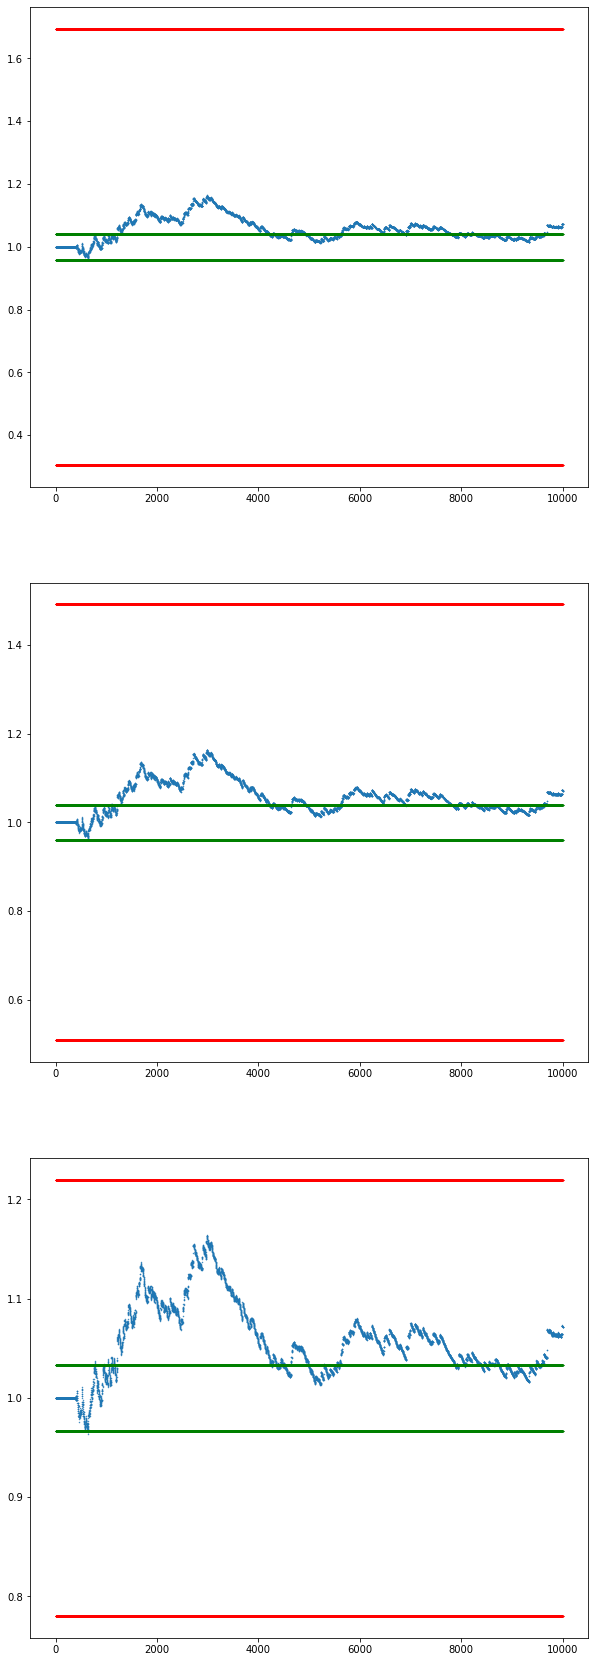

In [73]:
x = np.linspace(1, n, n)
fig, ax = plt.subplots(3, figsize=(10,30))

for i in range(len(alphas)):
    alpha = alphas[i]
#     ns = data_7['estimated/n']
    ns = np.full(n, n)

    chebyschew_lower, chebyschew_upper = chebyschew_bounds(ns, k, alpha)
    chernoff_lower, chernoff_upper = chernoff_bounds(ns, alpha)
    
    size = 0.2
    
    ax[i].scatter(x, data_7['estimated/n'], s=size)
    ax[i].scatter(x, chernoff_lower, color='green', s=size)
    ax[i].scatter(x, chernoff_upper, color='green', s=size)
    ax[i].scatter(x, chebyschew_lower, color='red', s=size)
    ax[i].scatter(x, chebyschew_upper, color='red', s=size)